## EDA, Regression(OLS), AB Testing & Clustering of Customers

In [26]:
#Import Statements
import random
from faker import Faker
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Function to generate random data for the data set
def generate_data(num_rows):
    fake = Faker('en_US')
    data = []

    for _ in range(num_rows):
        product = random.choice(['Cola', 'Lemonade', 'Energy Drink', 'Beer', 'Wine', 'Vodka', 'Coffee', 'Green Tea', 'Black Tea', 'Herbal Tea'])
        company = random.choice(['Coca-Cola', 'Pepsi', 'Dr. Pepper'])
        category = 'Soft Drink' if product in ['Cola', 'Lemonade', 'Energy Drink'] else 'Alcoholic' if product in ['Beer', 'Wine', 'Vodka'] else 'Coffee' if product == 'Coffee' else 'Tea'
        units_sold = random.randint(100, 1000)
        revenue = random.randint(1000, 10000)
        cost_of_goods_sold = random.randint(500, 8000)
        profit = revenue - cost_of_goods_sold
        purchase_date = fake.date_this_decade()
        customer_name = fake.name()
        customer_state = fake.state()
        customer_city = fake.city()
        customer_zipcode = fake.zipcode_in_state()
        order_id = fake.isbn10()
        r_and_d_cost = random.randint(100, 1000)
        tv_ad_cost = random.randint(500, 5000)
        print_ad_cost = random.randint(300, 3000)
        social_media_ad_cost = random.randint(200, 2000)
        customer_experience = random.choice(['Satisfied', 'Neutral', 'Dissatisfied'])

        data.append([product, company, category, units_sold, revenue, cost_of_goods_sold, profit, purchase_date, customer_name, customer_state, customer_city, customer_zipcode, order_id, r_and_d_cost, tv_ad_cost, print_ad_cost, social_media_ad_cost, customer_experience])

    return data

In [14]:
pd.set_option('display.max_columns', None)

In [5]:
# Generate the data set with 10,000 rows
num_rows = 10000
data_set = generate_data(num_rows)

# Create a DataFrame using Pandas
columns = ['Product', 'Company', 'Category', 'Units Sold', 'Revenue', 'Cost of Goods Sold', 'Profit', 'Purchase Date', 'Customer Name', 'Customer State', 'Customer City', 'Customer Zip Code', 'Order ID', 'R&D Cost', 'TV Ad Cost', 'Print Ad Cost', 'Social Media Ad Cost', 'Customer Experience']
df = pd.DataFrame(data_set, columns=columns)


In [6]:
df.head()

,Product,Company,Category,Units Sold,Revenue,Cost of Goods Sold,Profit,Purchase Date,Customer Name,Customer State,Customer City,Customer Zip Code,Order ID,R&D Cost,TV Ad Cost,Print Ad Cost,Social Media Ad Cost,Customer Experience
0,Coffee,Coca-Cola,Coffee,736,7404,4152,3252,2021-03-13,Joshua Taylor,North Dakota,Graceburgh,35687,1-00-751521-X,271,520,485,816,Neutral
1,Herbal Tea,Coca-Cola,Tea,720,8964,2736,6228,2022-12-16,Roger White,Washington,New Cory,17013,1-139-68737-9,159,627,2901,647,Neutral
2,Green Tea,Coca-Cola,Tea,955,6928,877,6051,2023-01-04,Caitlin Watson,Texas,West Larryberg,62151,0-85147-530-2,718,1728,1919,1334,Neutral
3,Herbal Tea,Pepsi,Tea,347,2730,3863,-1133,2022-02-25,Susan Kemp,Georgia,Jackborough,86283,1-969867-57-4,236,4155,2699,348,Satisfied
4,Coffee,Pepsi,Coffee,735,1339,6366,-5027,2023-07-03,Lori Walker,Oregon,Nguyenfort,65083,0-483-03020-1,764,2617,2585,1313,Satisfied


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Product               10000 non-null  object
 1   Company               10000 non-null  object
 2   Category              10000 non-null  object
 3   Units Sold            10000 non-null  int64 
 4   Revenue               10000 non-null  int64 
 5   Cost of Goods Sold    10000 non-null  int64 
 6   Profit                10000 non-null  int64 
 7   Purchase Date         10000 non-null  object
 8   Customer Name         10000 non-null  object
 9   Customer State        10000 non-null  object
 10  Customer City         10000 non-null  object
 11  Customer Zip Code     10000 non-null  object
 12  Order ID              10000 non-null  object
 13  R&D Cost              10000 non-null  int64 
 14  TV Ad Cost            10000 non-null  int64 
 15  Print Ad Cost         10000 non-null 

### Feature Engineering

In [8]:
# Assuming df is your DataFrame
df['Profit Margin'] = df['Profit'] / df['Revenue']
df['Cost per Unit'] = df['Cost of Goods Sold'] / df['Units Sold']
df['Revenue per Unit'] = df['Revenue'] / df['Units Sold']
df['Sales Growth Rate'] = df['Units Sold'].pct_change()
df['Cumulative Revenue'] = df['Revenue'].cumsum()
df['Cumulative Profit'] = df['Profit'].cumsum()

In [10]:
df["Purchase Date"] = pd.to_datetime(df["Purchase Date"])

In [11]:
# Assuming you have a 'Purchase Date' column in datetime format
df['Month'] = df['Purchase Date'].dt.month
df['Quarter'] = df['Purchase Date'].dt.quarter
df['Season'] = df['Purchase Date'].dt.month % 12 // 3 + 1

In [22]:
df['Year'] = df['Purchase Date'].dt.year

In [12]:
# Assuming you want to segment high-value customers
df['High Value Customer'] = df['Revenue'] > df['Revenue'].mean()

In [23]:
df.head()

,Product,Company,Category,Units Sold,Revenue,Cost of Goods Sold,Profit,Purchase Date,Customer Name,Customer State,Customer City,Customer Zip Code,Order ID,R&D Cost,TV Ad Cost,Print Ad Cost,Social Media Ad Cost,Customer Experience,Profit Margin,Cost per Unit,Revenue per Unit,Sales Growth Rate,Cumulative Revenue,Cumulative Profit,Month,Quarter,Season,High Value Customer,Year
1,Herbal Tea,Coca-Cola,Tea,720,8964,2736,6228,2022-12-16,Roger White,Washington,New Cory,17013,1-139-68737-9,159,627,2901,647,Neutral,0.694779,3.800000,12.450000,-0.021739,16368,9480,12,4,1,True,2022
2,Green Tea,Coca-Cola,Tea,955,6928,877,6051,2023-01-04,Caitlin Watson,Texas,West Larryberg,62151,0-85147-530-2,718,1728,1919,1334,Neutral,0.873412,0.918325,7.254450,0.326389,23296,15531,1,1,1,True,2023
3,Herbal Tea,Pepsi,Tea,347,2730,3863,-1133,2022-02-25,Susan Kemp,Georgia,Jackborough,86283,1-969867-57-4,236,4155,2699,348,Satisfied,-0.415018,11.132565,7.867435,-0.636649,26026,14398,2,1,1,False,2022
4,Coffee,Pepsi,Coffee,735,1339,6366,-5027,2023-07-03,Lori Walker,Oregon,Nguyenfort,65083,0-483-03020-1,764,2617,2585,1313,Satisfied,-3.754294,8.661224,1.821769,1.118156,27365,9371,7,3,3,False,2023
5,Beer,Pepsi,Alcoholic,640,6702,3277,3425,2020-08-24,Melissa Browning,North Dakota,Tylerhaven,55504,1-09-826491-6,276,3987,1165,664,Satisfied,0.511041,5.120312,10.471875,-0.129252,34067,12796,8,3,3,True,2020


In [19]:
df.dropna(inplace = True)

In [91]:
df = df.replace([np.inf, -np.inf], np.nan)

### Section 1 EDA

#####  What is the distribution of products sold?

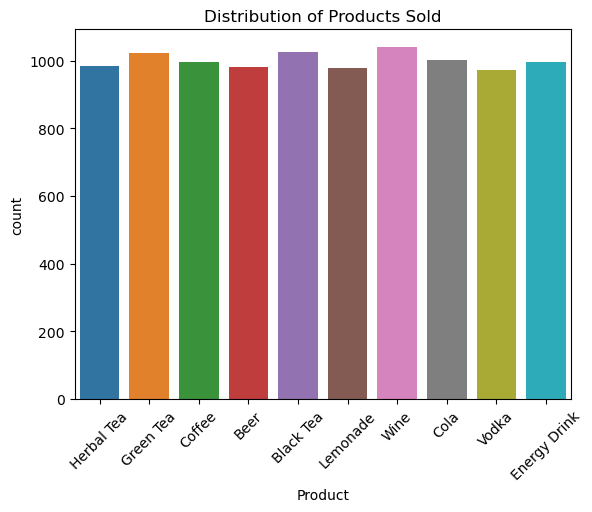

In [27]:
sns.countplot(data=df, x='Product')
plt.xticks(rotation=45)
plt.title('Distribution of Products Sold')
plt.show()

##### Explanation: This plot shows the count of each product sold, helping to understand which products are more popular.

#### What is the average profit per product category?

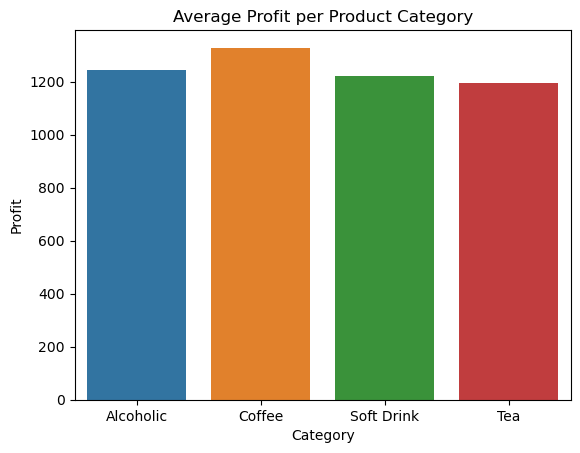

In [28]:
avg_profit_per_category = df.groupby('Category')['Profit'].mean().reset_index()
sns.barplot(data=avg_profit_per_category, x='Category', y='Profit')
plt.title('Average Profit per Product Category')
plt.show()

##### Explanation: This bar plot shows the average profit for each product category, giving insights into the profitability of different categories.

#### How does the revenue vary by company?

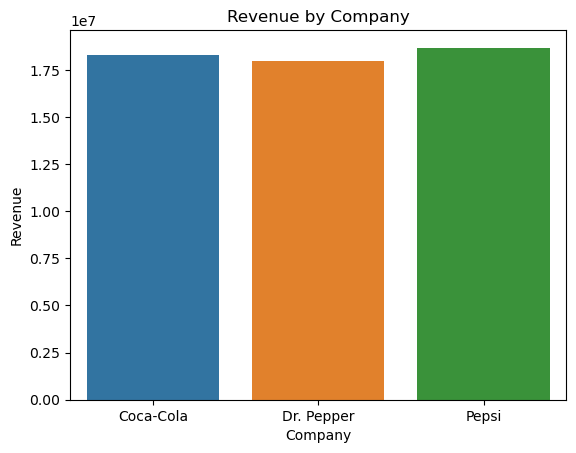

In [29]:
revenue_by_company = df.groupby('Company')['Revenue'].sum().reset_index()
sns.barplot(data=revenue_by_company, x='Company', y='Revenue')
plt.title('Revenue by Company')
plt.show()

##### Explanation: This bar plot shows the total revenue generated by each company, highlighting the major revenue contributors.

#### What is the relationship between units sold and profit?

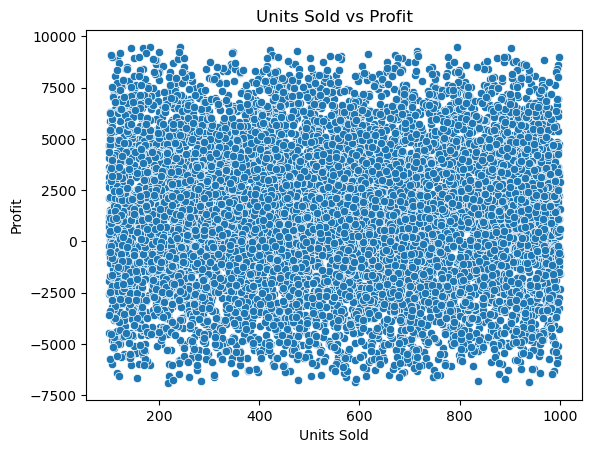

In [30]:
sns.scatterplot(data=df, x='Units Sold', y='Profit')
plt.title('Units Sold vs Profit')
plt.show()


##### Explanation: This scatter plot shows the relationship between the number of units sold and the profit, indicating how sales volume impacts profitability.

#### How does customer experience affect profit?

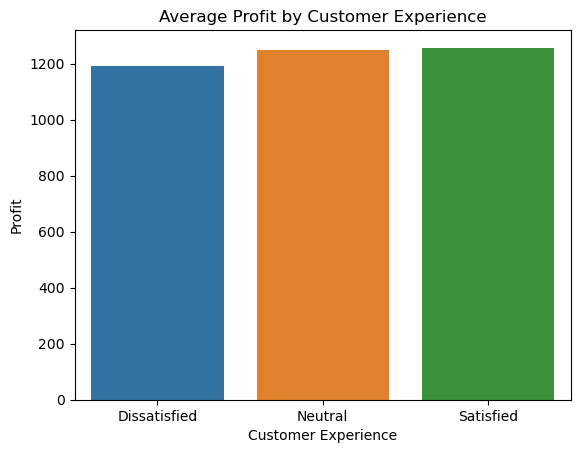

In [31]:
avg_profit_by_experience = df.groupby('Customer Experience')['Profit'].mean().reset_index()
sns.barplot(data=avg_profit_by_experience, x='Customer Experience', y='Profit')
plt.title('Average Profit by Customer Experience')
plt.show()

##### Explanation: This bar plot shows the average profit based on customer experience ratings, revealing the impact of customer satisfaction on profitability.

#### What is the distribution of purchase dates?

C:\Users\ysagp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


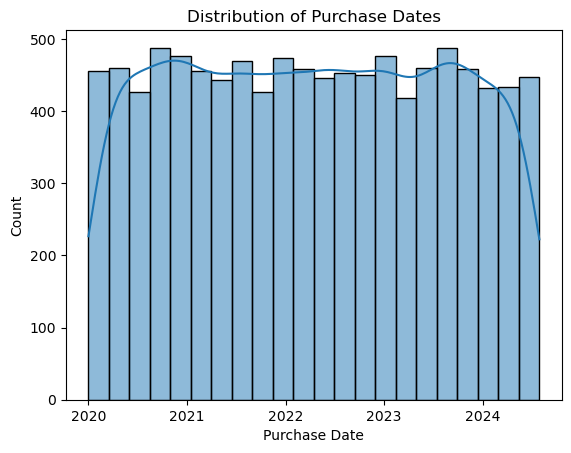

In [92]:
sns.histplot(df['Purchase Date'], kde=True)
plt.title('Distribution of Purchase Dates')
plt.show()

##### Explanation: This histogram shows the distribution of purchase dates, indicating the periods with higher sales activity.

#### What is the monthly sales trend?

C:\Users\ysagp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ysagp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


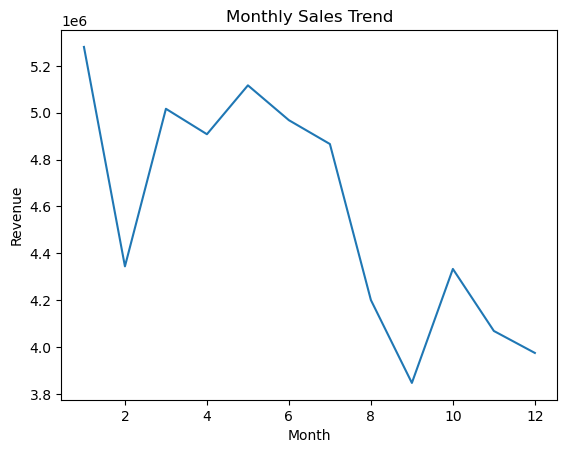

In [33]:
df['Month'] = df['Purchase Date'].dt.month
monthly_sales = df.groupby('Month')['Revenue'].sum().reset_index()
sns.lineplot(data=monthly_sales, x='Month', y='Revenue')
plt.title('Monthly Sales Trend')
plt.show()

##### Explanation: This line plot shows the sales trend across different months, identifying peak sales periods.

#### What is the revenue trend by year?

C:\Users\ysagp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ysagp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


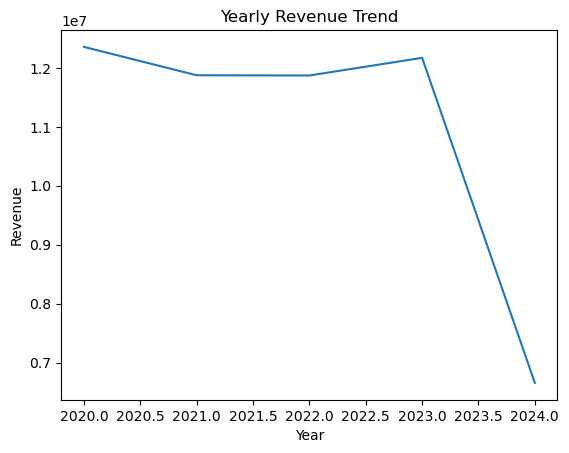

In [37]:
df['Year'] = df['Purchase Date'].dt.year
yearly_revenue = df.groupby('Year')['Revenue'].sum().reset_index()
sns.lineplot(data=yearly_revenue, x='Year', y='Revenue')
plt.title('Yearly Revenue Trend')
plt.show()


##### Explanation: This line plot shows the revenue trend over the years, highlighting the growth or decline in revenue.

#### How does the profit margin vary by product?

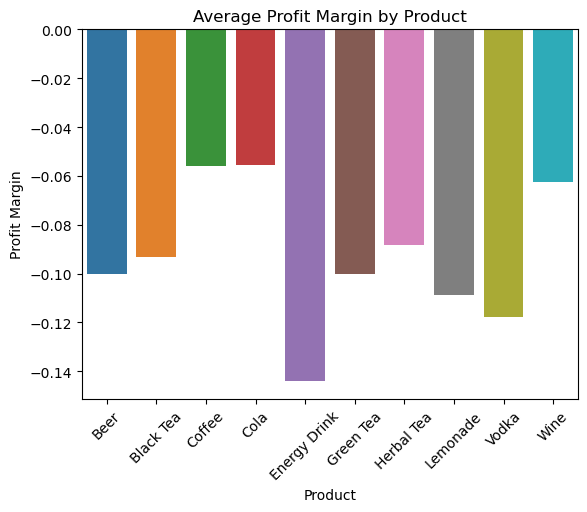

In [38]:
avg_profit_margin_by_product = df.groupby('Product')['Profit Margin'].mean().reset_index()
sns.barplot(data=avg_profit_margin_by_product, x='Product', y='Profit Margin')
plt.xticks(rotation=45)
plt.title('Average Profit Margin by Product')
plt.show()


##### Explanation: This bar plot shows the average profit margin for each product, helping to identify the most profitable products.

#### What is the total ad cost by category?

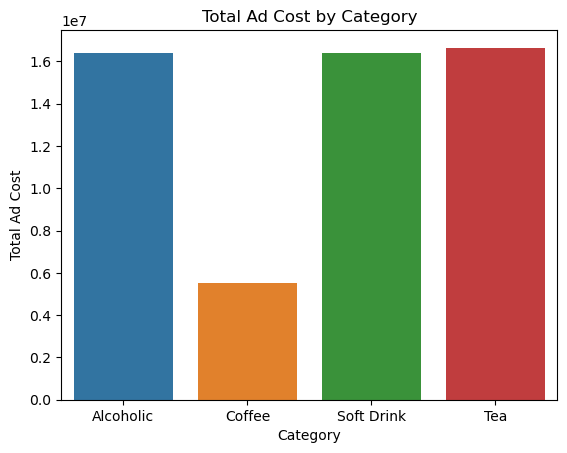

In [39]:
df['Total Ad Cost'] = df['TV Ad Cost'] + df['Print Ad Cost'] + df['Social Media Ad Cost']
total_ad_cost_by_category = df.groupby('Category')['Total Ad Cost'].sum().reset_index()
sns.barplot(data=total_ad_cost_by_category, x='Category', y='Total Ad Cost')
plt.title('Total Ad Cost by Category')
plt.show()


##### Explanation: This bar plot shows the total advertisement cost for each product category, providing insights into advertising spending.

#### What is the average R&D cost by product?

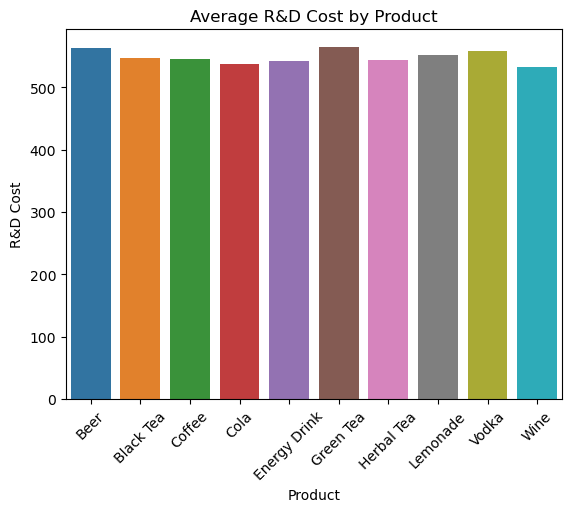

In [40]:
avg_rd_cost_by_product = df.groupby('Product')['R&D Cost'].mean().reset_index()
sns.barplot(data=avg_rd_cost_by_product, x='Product', y='R&D Cost')
plt.xticks(rotation=45)
plt.title('Average R&D Cost by Product')
plt.show()


##### Explanation: This bar plot shows the average R&D cost for each product, indicating the investment in research and development.

#### How does the cost of goods sold vary by product?

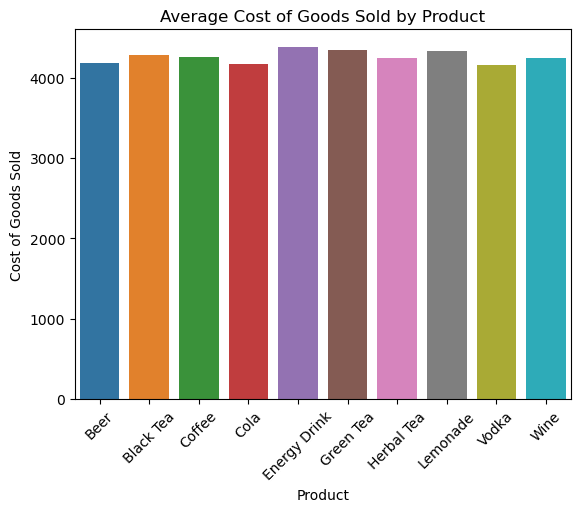

In [41]:
avg_cogs_by_product = df.groupby('Product')['Cost of Goods Sold'].mean().reset_index()
sns.barplot(data=avg_cogs_by_product, x='Product', y='Cost of Goods Sold')
plt.xticks(rotation=45)
plt.title('Average Cost of Goods Sold by Product')
plt.show()

##### Explanation: This bar plot shows the average cost of goods sold for each product, helping to understand production costs.

#### What is the revenue distribution by customer state?

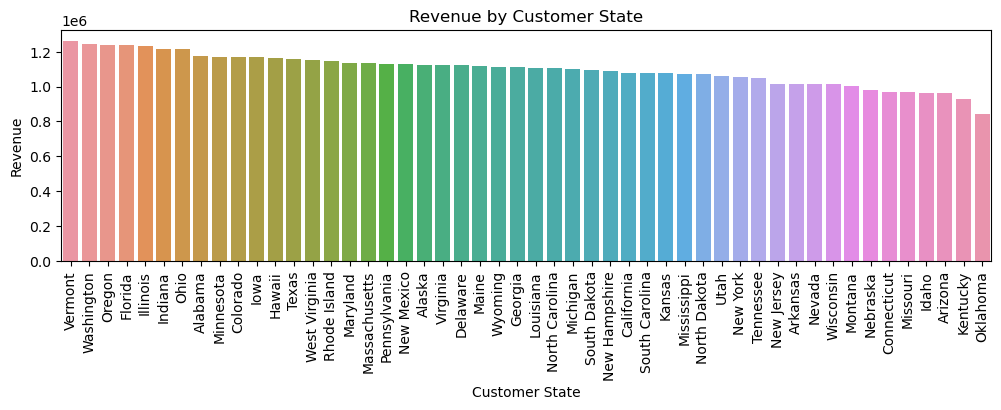

In [48]:
revenue_by_state = df.groupby('Customer State')['Revenue'].sum().reset_index()
revenue_by_state = revenue_by_state.sort_values(by='Revenue', ascending=False)
plt.figure(figsize=(12, 3))
sns.barplot(data=revenue_by_state, x='Customer State', y='Revenue')
plt.xticks(rotation=90)
plt.title('Revenue by Customer State')
plt.show()

##### Explanation: This bar plot shows the total revenue generated by customers from different states, highlighting geographical revenue distribution.

#### What is the correlation between numerical features?

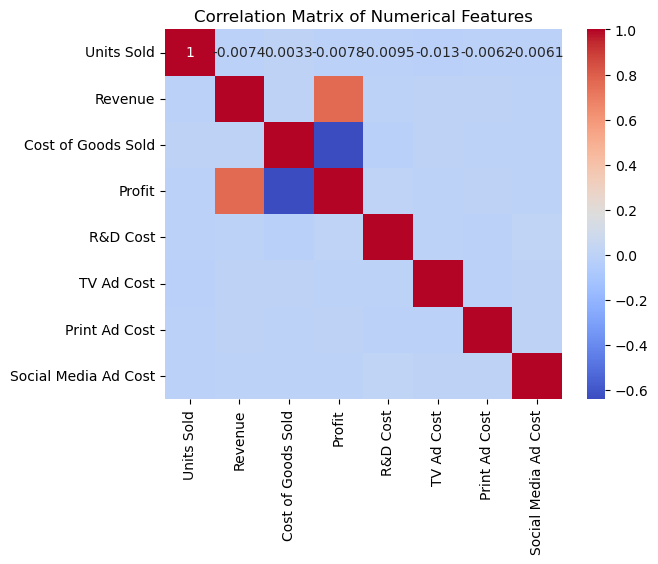

In [49]:
corr = df[['Units Sold', 'Revenue', 'Cost of Goods Sold', 'Profit', 'R&D Cost', 'TV Ad Cost', 'Print Ad Cost', 'Social Media Ad Cost']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()


##### Explanation: This heatmap shows the correlation between different numerical features, helping to identify relationships between variables.

#### How does the cumulative revenue trend over time?

C:\Users\ysagp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ysagp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


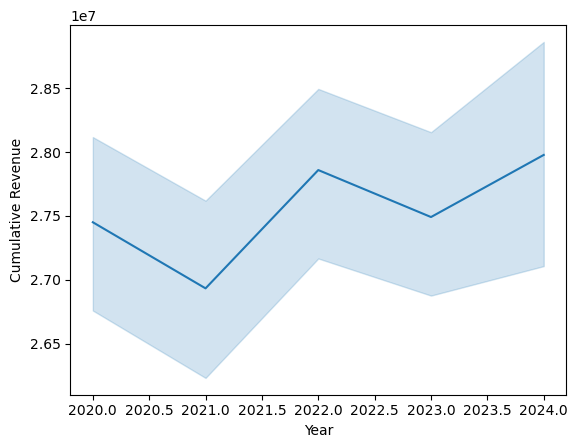

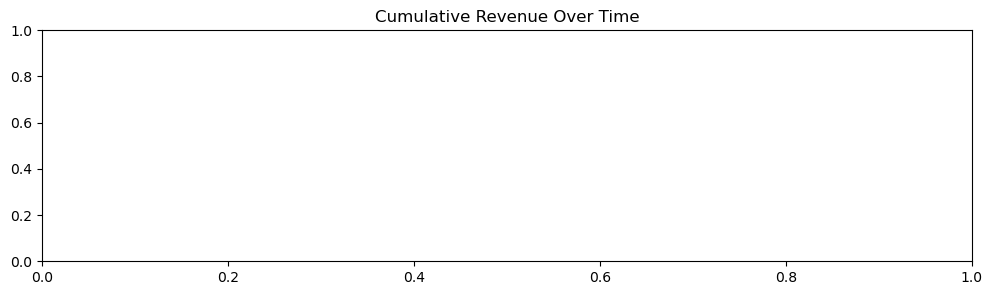

In [54]:
df['Cumulative Revenue'] = df['Revenue'].cumsum()
sns.lineplot(data=df, x='Year', y='Cumulative Revenue')
plt.figure(figsize=(12, 3))
plt.title('Cumulative Revenue Over Time')
plt.show()

##### Explanation: This line plot shows the cumulative revenue over time, providing a long-term view of revenue growth.

### Section 2: Predictive Analysis with OLS
To predict profit based on spending on relevant variables (R&D Cost, TV Ad Cost, Print Ad Cost, Social Media Ad Cost), we can use Ordinary Least Squares (OLS) regression:

In [56]:
import statsmodels.api as sm

In [57]:
# Define the independent variables
X = df[['R&D Cost', 'TV Ad Cost', 'Print Ad Cost', 'Social Media Ad Cost']]
X = sm.add_constant(X)  # Add a constant term

In [58]:
# Define the dependent variable
y = df['Profit']

In [59]:
# Fit the OLS model
model = sm.OLS(y, X).fit()

In [60]:
# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.3657
Date:                Tue, 30 Jul 2024   Prob (F-statistic):              0.833
Time:                        13:31:43   Log-Likelihood:                -95416.
No. Observations:                9999   AIC:                         1.908e+05
Df Residuals:                    9994   BIC:                         1.909e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1131.6376 

##### Explanation: This code fits an OLS regression model to predict profit based on the specified ad costs and R&D cost, and prints the model summary.


The OLS regression results provide a summary of the relationship between the dependent variable (Profit) and the independent variables (R&D Cost, TV Ad Cost, Print Ad Cost, Social Media Ad Cost). Here is an explanation and summary of the results:

##### Summary of OLS Regression Results

Model Overview

Dependent Variable: Profit

Number of Observations: 9999

Model: Ordinary Least Squares (OLS)

R-squared: 0.000

Adj. R-squared: -0.000

F-statistic: 0.3657

Prob (F-statistic): 0.833

##### Interpretation of Key Metrics
R-squared (0.000): Indicates that the model explains none of the variance in the dependent variable (Profit). This means that the independent variables do not provide any explanatory power for predicting profit.

Adj. R-squared (-0.000): Adjusted R-squared is slightly negative, which also suggests that the model does not fit the data well.

F-statistic (0.3657): Measures the overall significance of the regression model. A low F-statistic value and a high p-value (0.833) indicate that the model is not statistically significant.

Prob (F-statistic): The probability that the observed F-statistic would occur if the null hypothesis (that all regression coefficients are zero) were true. A value of 0.833 indicates a high likelihood, suggesting that the model is not significant.

##### Coefficients and their Interpretation
const (1131.6376): The intercept of the regression model. It represents the expected value of Profit when all independent variables are zero.

R&D Cost (0.1423): The coefficient suggests a positive relationship between R&D Cost and Profit, but the effect is not statistically significant (p-value = 0.274).

TV Ad Cost (-0.0034): Indicates a negligible and negative relationship between TV Ad Cost and Profit, but the effect is not statistically significant (p-value = 0.895).

Print Ad Cost (0.0217): Suggests a small positive relationship between Print Ad Cost and Profit, but the effect is not statistically significant (p-value = 0.614).

Social Media Ad Cost (-0.0040): Indicates a negligible and negative relationship between Social Media Ad Cost and Profit, but the effect is not statistically significant (p-value = 0.951).

##### Statistical Tests

Omnibus (293.988): A test for normality of the residuals. A high value suggests the residuals are not normally distributed.

Prob(Omnibus) (0.000): The probability that the residuals are normally distributed. A value close to zero indicates non-normality.

Jarque-Bera (JB) (140.945): Another test for normality of residuals. The high value supports the result from the Omnibus test.

Skew (0.003): Measures the asymmetry of the distribution of residuals. A value close to zero indicates symmetry.

Kurtosis (2.418): Measures the peakedness of the residuals' distribution. A value close to 3 indicates a normal distribution.

Durbin-Watson (1.986): Tests for the presence of autocorrelation in the residuals. A value close to 2 suggests no autocorrelation.

##### Conclusion
The regression model does not provide a meaningful explanation of the variation in Profit based on the independent variables (R&D Cost, TV Ad Cost, Print Ad Cost, Social Media Ad Cost). None of the independent variables are statistically significant predictors of Profit, and the overall model fit is very poor (R-squared of 0.000). This suggests that other factors not included in this model may be more relevant for predicting Profit, and further analysis is needed to identify these factors.

### Section 3: AB Testing
For A/B testing, let's assume we want to test the impact of a new advertising strategy on revenue. We'll create a binary variable indicating whether a sale was made under the new strategy or the old strategy, and then perform the test.

In [61]:
# Create a binary variable for A/B testing
df['New Strategy'] = df['Purchase Date'].dt.month > 6  # Assume new strategy started in July

In [62]:
# Conduct A/B testing using t-test
from scipy.stats import ttest_ind

In [63]:
# Split the data into two groups
group_a = df[df['New Strategy'] == False]['Revenue']
group_b = df[df['New Strategy'] == True]['Revenue']

In [64]:
# Perform the t-test
t_stat, p_value = ttest_ind(group_a, group_b)

In [65]:
print(f"T-Statistic: {t_stat}, P-Value: {p_value}")

T-Statistic: 0.8100278955316205, P-Value: 0.41794342385768224


##### Explanation: This code conducts an A/B test to compare the revenue generated under the old and new advertising strategies using a t-test, and prints the test statistics. If the p-value is less than 0.05, we can conclude that the new strategy has a statistically significant impact on revenue.

##### T-Statistic
The T-Statistic value of 0.8100278955316205 indicates the difference in means between the two groups (Group A and Group B) relative to the variation in the sample data. A T-Statistic close to 0 suggests that the means of the two groups are very similar, meaning there is little difference between the revenue under the old strategy and the revenue under the new strategy.

##### P-Value
The P-Value of 0.41794342385768224 provides the probability of observing the data (or something more extreme) assuming that the null hypothesis is true. The null hypothesis typically states that there is no difference between the two groups.

In general, a P-Value below 0.05 is considered statistically significant, indicating strong evidence against the null hypothesis, and suggesting that the observed difference is unlikely to be due to chance.

#### Explanation of Results
T-Statistic: 0.8100278955316205: This value is quite close to 0, suggesting that there is no substantial difference between the revenues of the two groups.

P-Value: 0.41794342385768224: This value is much higher than the conventional threshold of 0.05. Therefore, we do not have sufficient evidence to reject the null hypothesis.

#### Conclusion
Based on these results, we can conclude that the new advertising strategy did not lead to a statistically significant difference in revenue compared to the old strategy. The observed differences in revenue are likely due to random chance rather than a real effect of the new strategy. Hence, the new strategy does not appear to have a meaningful impact on revenue.

In [66]:
df1 = df.copy()

In [71]:
df1.head(1)

,Product,Company,Category,Units Sold,Revenue,Cost of Goods Sold,Profit,Purchase Date,Customer Name,Customer State,Customer City,Customer Zip Code,Order ID,R&D Cost,TV Ad Cost,Print Ad Cost,Social Media Ad Cost,Customer Experience,Profit Margin,Cost per Unit,Revenue per Unit,Sales Growth Rate,Cumulative Revenue,Cumulative Profit,Month,Quarter,Season,High Value Customer,Year,Total Ad Cost,New Strategy
1,Herbal Tea,Coca-Cola,Tea,720,8964,2736,6228,2022-12-16,Roger White,Washington,New Cory,17013,1-139-68737-9,159,627,2901,647,Neutral,0.694779,3.8,12.45,-0.021739,8964,9480,12,4,1,True,2022,4175,True


In [70]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
# Select relevant features and retain player identifiers
features = ["Revenue", "Profit", "Units Sold", "Cumulative Profit", "Profit Margin"]
df_subset = df1[["Customer Experience", "Customer Name"] + features]

In [73]:
# Drop rows with missing values in features
df_subset = df_subset.dropna()

# Standardize the features
X = df_subset[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [74]:
# Determine the optimal number of clusters using the Elbow method
inertia = []
sil_scores = []
k_range = range(3, 11)  # Start from 2 clusters for silhouette score calculation

In [75]:
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(X_scaled)
    inertia.append(kmeans.inertia_)
    sil_score = silhouette_score(X_scaled, clusters)
    sil_scores.append(sil_score)

In [76]:
# Ensure that k_range and scores have the same length
k_range = list(k_range)  # Convert to list for consistent indexing

In [77]:
# Plot the Elbow curve and Silhouette Scores
plt.figure(figsize=(14, 6))

<Figure size 1400x600 with 0 Axes>

<Figure size 1400x600 with 0 Axes>

Text(0.5, 1.0, 'Elbow Method for Optimal k')

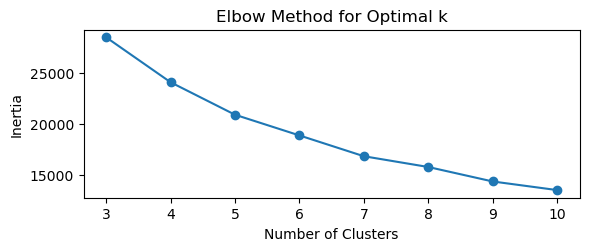

In [78]:
# Plot Inertia for the Elbow Method
plt.subplot(2, 1, 1)
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')

Text(0.5, 1.0, 'Silhouette Score for Optimal k')

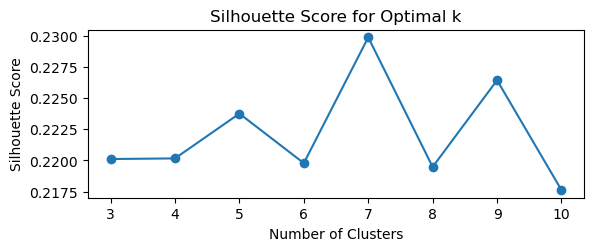

In [79]:
# Plot Silhouette Scores
plt.subplot(2, 1, 1)
plt.plot(k_range, sil_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')

In [80]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [81]:
# Choose the optimal number of clusters based on both Elbow and Silhouette Score
optimal_k = k_range[np.argmax(sil_scores)]
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df_subset['cluster'] = kmeans.fit_predict(X_scaled)

In [83]:
# Analyze the clusters
cluster_summary = df_subset.groupby('cluster')[features].mean()
print("\nCluster Summary:")
cluster_summary


Cluster Summary:


,Revenue,Profit,Units Sold,Cumulative Profit,Profit Margin
cluster,,,,,
0,8040.781289,4479.403346,800.745973,5.311157e+06,0.563524
1,7627.156126,4044.965086,375.575099,9.573726e+06,0.532578
2,3962.297091,-392.824792,744.256925,2.878029e+06,-0.155207
3,1725.028037,-4547.928738,567.994159,6.116804e+06,-2.854421
4,4519.491337,86.474012,754.989605,9.712114e+06,-0.032462
5,7279.063789,3286.373711,340.073454,2.934953e+06,0.452315
6,3404.622774,-1158.682570,300.182570,6.688424e+06,-0.400510


In [84]:
# Display the DataFrame with player identifiers and cluster labels
print("\nDataFrame with Clusters:")
print(df_subset[["Customer Experience", "Customer Name"]].head())


DataFrame with Clusters:
  Customer Experience     Customer Name
1             Neutral       Roger White
2             Neutral    Caitlin Watson
3           Satisfied        Susan Kemp
4           Satisfied       Lori Walker
5           Satisfied  Melissa Browning


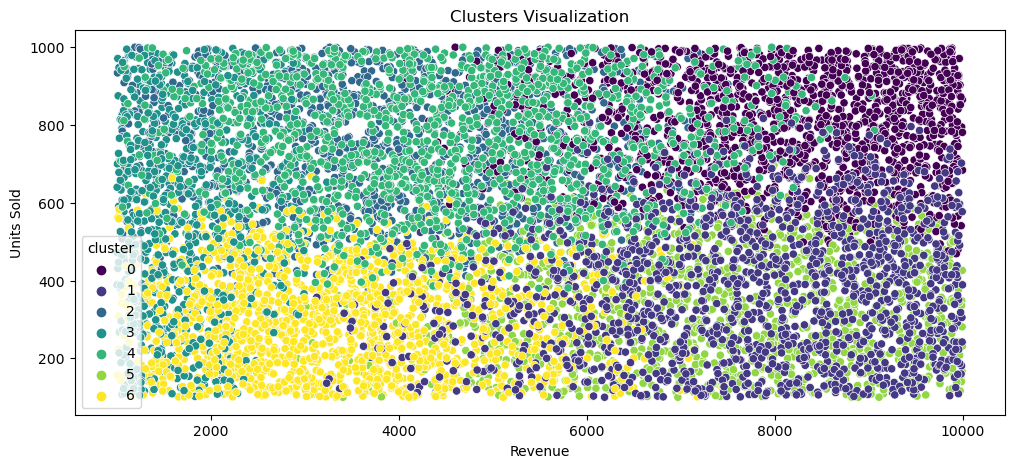

In [90]:
# Visualize clusters
plt.figure(figsize=(12, 5))
sns.scatterplot(data=df_subset, x='Revenue', y='Units Sold', hue='cluster', palette='viridis')
plt.title('Clusters Visualization')
plt.show()